In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_c = pd.read_csv("flo_data_20k.csv")

In [3]:
df = df_c.copy()

In [4]:
df

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]
...,...,...,...,...,...,...,...,...,...,...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,Android App,Offline,2019-09-21,2020-07-05,2020-06-05,2020-07-05,1.0,2.0,289.98,111.98,"[ERKEK, AKTIFSPOR]"
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,Desktop,Desktop,2020-03-01,2020-12-22,2020-12-22,2020-03-01,1.0,1.0,150.48,239.99,[AKTIFSPOR]
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,Ios App,Ios App,2019-09-11,2021-05-24,2021-05-24,2019-09-11,2.0,1.0,139.98,492.96,[AKTIFSPOR]
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,Android App,Android App,2019-03-27,2021-02-13,2021-02-13,2021-01-08,1.0,5.0,711.79,297.98,"[ERKEK, AKTIFSPOR]"


In [5]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [6]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0,3.110855,4.225647,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.0,1.913913,2.062880,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.0,253.922597,301.532853,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.0,497.321690,832.601886,12.99,149.98,286.46,578.44,45220.13


0.01 and 0.99 values are more logical for this problem

In [8]:
replace_with_thresholds(df, "order_num_total_ever_online")
replace_with_thresholds(df, "order_num_total_ever_offline")
replace_with_thresholds(df, "customer_value_total_ever_offline")
replace_with_thresholds(df, "customer_value_total_ever_online")

In [9]:
df.loc[df["order_num_total_ever_online"] == df["order_num_total_ever_online"].max(),"order_num_total_ever_online"]= 48

In [10]:
df["total_order_num_ever"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
df["total_customer_value_ever"] = (df["order_num_total_ever_offline"]* df["customer_value_total_ever_offline"]) + (df["order_num_total_ever_online"]* df["customer_value_total_ever_online"])

In [11]:
import datetime as dt
df['first_order_date'] = pd.to_datetime(df['first_order_date'])
df['last_order_date'] = pd.to_datetime(df['last_order_date'])
df['last_order_date_online'] = pd.to_datetime(df['last_order_date_online'])
df['last_order_date_offline'] = pd.to_datetime(df['last_order_date_offline'])

In [12]:
df.dtypes

master_id                                    object
order_channel                                object
last_order_channel                           object
first_order_date                     datetime64[ns]
last_order_date                      datetime64[ns]
last_order_date_online               datetime64[ns]
last_order_date_offline              datetime64[ns]
order_num_total_ever_online                 float64
order_num_total_ever_offline                float64
customer_value_total_ever_offline           float64
customer_value_total_ever_online            float64
interested_in_categories_12                  object
total_order_num_ever                        float64
total_customer_value_ever                   float64
dtype: object

In [13]:
df["recency_cltv_weekly"] = df.apply(lambda x: (x["last_order_date"] - x["first_order_date"]).days,axis = 1)

In [14]:
df["recency_cltv_weekly"] = df["recency_cltv_weekly"] // 7

In [15]:
datum_date = dt.datetime(2021, 6, 2)
df["T_weekly"] = df.apply(lambda x: (datum_date - x["first_order_date"]).days, axis = 1)

In [16]:
df["T_weekly"] = df["T_weekly"] // 7

In [17]:
df

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order_num_ever,total_customer_value_ever,recency_cltv_weekly,T_weekly
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,3337.51,17,30
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,35537.96,209,225
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,1565.99,52,79
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97,1,21
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98,83,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,Android App,Offline,2019-09-21,2020-07-05,2020-06-05,2020-07-05,1.0,2.0,289.98,111.98,"[ERKEK, AKTIFSPOR]",3.0,691.94,41,88
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,Desktop,Desktop,2020-03-01,2020-12-22,2020-12-22,2020-03-01,1.0,1.0,150.48,239.99,[AKTIFSPOR],2.0,390.47,42,65
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,Ios App,Ios App,2019-09-11,2021-05-24,2021-05-24,2019-09-11,2.0,1.0,139.98,492.96,[AKTIFSPOR],3.0,1125.90,88,90
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,Android App,Android App,2019-03-27,2021-02-13,2021-02-13,2021-01-08,1.0,5.0,711.79,297.98,"[ERKEK, AKTIFSPOR]",6.0,3856.93,98,114


In [18]:
df["frequency"] = df ["total_order_num_ever"]

In [19]:
df["monetary_cltv_avg"] = df["total_customer_value_ever"] / df["frequency"]

In [20]:
df

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order_num_ever,total_customer_value_ever,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,3337.51,17,30,5.0,667.502000
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,35537.96,209,225,21.0,1692.283810
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,1565.99,52,79,5.0,313.198000
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97,1,21,2.0,60.985000
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98,83,95,2.0,104.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,Android App,Offline,2019-09-21,2020-07-05,2020-06-05,2020-07-05,1.0,2.0,289.98,111.98,"[ERKEK, AKTIFSPOR]",3.0,691.94,41,88,3.0,230.646667
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,Desktop,Desktop,2020-03-01,2020-12-22,2020-12-22,2020-03-01,1.0,1.0,150.48,239.99,[AKTIFSPOR],2.0,390.47,42,65,2.0,195.235000
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,Ios App,Ios App,2019-09-11,2021-05-24,2021-05-24,2019-09-11,2.0,1.0,139.98,492.96,[AKTIFSPOR],3.0,1125.90,88,90,3.0,375.300000
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,Android App,Android App,2019-03-27,2021-02-13,2021-02-13,2021-01-08,1.0,5.0,711.79,297.98,"[ERKEK, AKTIFSPOR]",6.0,3856.93,98,114,6.0,642.821667


In [21]:
cltv_df = df.filter(["master_id",'recency_cltv_weekly',"T_weekly",'frequency','monetary_cltv_avg'], axis=1)

In [22]:
cltv_df = cltv_df.rename(columns={'master_id': 'CUSTOMER ID'})
cltv_df = cltv_df.set_index('CUSTOMER ID')
cltv_df

,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg
CUSTOMER ID,,,,
cc294636-19f0-11eb-8d74-000d3a38a36f,17,30,5.0,667.502000
f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,209,225,21.0,1692.283810
69b69676-1a40-11ea-941b-000d3a38a36f,52,79,5.0,313.198000
1854e56c-491f-11eb-806e-000d3a38a36f,1,21,2.0,60.985000
d6ea1074-f1f5-11e9-9346-000d3a38a36f,83,95,2.0,104.990000
...,...,...,...,...
727e2b6e-ddd4-11e9-a848-000d3a38a36f,41,88,3.0,230.646667
25cd53d4-61bf-11ea-8dd8-000d3a38a36f,42,65,2.0,195.235000
8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,88,90,3.0,375.300000


In [23]:
!pip install lifetimes
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
from sklearn.preprocessing import MinMaxScaler

  Using cached Lifetimes-0.11.3-py3-none-any.whl (584 kB)
     -------------------------------------- 48.9/48.9 kB 205.9 kB/s eta 0:00:00


In [24]:
bgf = BetaGeoFitter(penalizer_coef=0.001)

bgf.fit(cltv_df['frequency'],
        cltv_df['recency_cltv_weekly'],
        cltv_df['T_weekly'])

<lifetimes.BetaGeoFitter: fitted with 19945 subjects, a: 0.00, alpha: 75.71, b: 0.00, r: 3.65>

In [25]:
cltv_df["exp_sales_3_month"] = bgf.predict(12,
                                               cltv_df['frequency'],
        cltv_df['recency_cltv_weekly'],
        cltv_df['T_weekly'])

In [26]:
cltv_df

,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month
CUSTOMER ID,,,,,
cc294636-19f0-11eb-8d74-000d3a38a36f,17,30,5.0,667.502000,0.982382
f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,209,225,21.0,1692.283810,0.983830
69b69676-1a40-11ea-941b-000d3a38a36f,52,79,5.0,313.198000,0.671245
1854e56c-491f-11eb-806e-000d3a38a36f,1,21,2.0,60.985000,0.701564
d6ea1074-f1f5-11e9-9346-000d3a38a36f,83,95,2.0,104.990000,0.397452
...,...,...,...,...,...
727e2b6e-ddd4-11e9-a848-000d3a38a36f,41,88,3.0,230.646667,0.487745
25cd53d4-61bf-11ea-8dd8-000d3a38a36f,42,65,2.0,195.235000,0.482189
8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,88,90,3.0,375.300000,0.481859


In [27]:
cltv_df["exp_sales_6_month"] = bgf.predict(24,
                                               cltv_df['frequency'],
        cltv_df['recency_cltv_weekly'],
        cltv_df['T_weekly'])

In [28]:
cltv_df

,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month
CUSTOMER ID,,,,,,
cc294636-19f0-11eb-8d74-000d3a38a36f,17,30,5.0,667.502000,0.982382,1.964765
f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,209,225,21.0,1692.283810,0.983830,1.967661
69b69676-1a40-11ea-941b-000d3a38a36f,52,79,5.0,313.198000,0.671245,1.342491
1854e56c-491f-11eb-806e-000d3a38a36f,1,21,2.0,60.985000,0.701564,1.403129
d6ea1074-f1f5-11e9-9346-000d3a38a36f,83,95,2.0,104.990000,0.397452,0.794904
...,...,...,...,...,...,...
727e2b6e-ddd4-11e9-a848-000d3a38a36f,41,88,3.0,230.646667,0.487745,0.975491
25cd53d4-61bf-11ea-8dd8-000d3a38a36f,42,65,2.0,195.235000,0.482189,0.964378
8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,88,90,3.0,375.300000,0.481859,0.963717


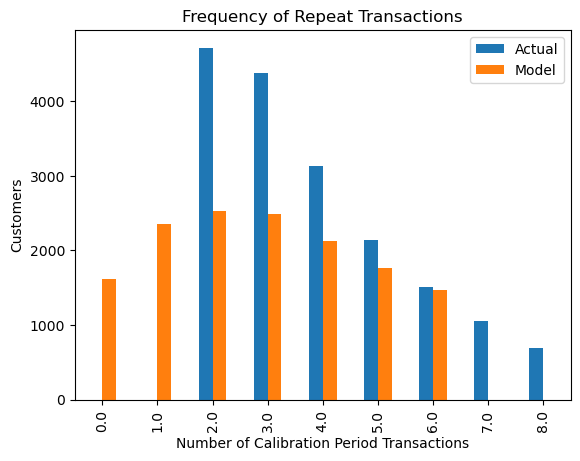

In [29]:
plot_period_transactions(bgf)
plt.show()

In [30]:
ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(cltv_df['frequency'], cltv_df['monetary_cltv_avg'])

<lifetimes.GammaGammaFitter: fitted with 19945 subjects, p: 3.73, q: 0.33, v: 3.67>

In [31]:
cltv_df["exp_average_value"] = ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                                                             cltv_df['monetary_cltv_avg'])

In [32]:
cltv_df

,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month,exp_average_value
CUSTOMER ID,,,,,,,
cc294636-19f0-11eb-8d74-000d3a38a36f,17,30,5.0,667.502000,0.982382,1.964765,693.183640
f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,209,225,21.0,1692.283810,0.983830,1.967661,1707.087003
69b69676-1a40-11ea-941b-000d3a38a36f,52,79,5.0,313.198000,0.671245,1.342491,325.651660
1854e56c-491f-11eb-806e-000d3a38a36f,1,21,2.0,60.985000,0.701564,1.403129,69.028611
d6ea1074-f1f5-11e9-9346-000d3a38a36f,83,95,2.0,104.990000,0.397452,0.794904,117.384607
...,...,...,...,...,...,...,...
727e2b6e-ddd4-11e9-a848-000d3a38a36f,41,88,3.0,230.646667,0.487745,0.975491,246.664684
25cd53d4-61bf-11ea-8dd8-000d3a38a36f,42,65,2.0,195.235000,0.482189,0.964378,216.552586
8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,88,90,3.0,375.300000,0.481859,0.963717,400.548854


In [33]:
cltv = ggf.customer_lifetime_value(bgf,
                                   cltv_df['frequency'],
                                   cltv_df['recency_cltv_weekly'],
                                   cltv_df['T_weekly'],
                                   cltv_df['monetary_cltv_avg'],
                                   time=6, 
                                   freq="W", 
                                   discount_rate=0.01)

In [34]:
cltv

CUSTOMER ID
cc294636-19f0-11eb-8d74-000d3a38a36f    1428.981467
f431bd5a-ab7b-11e9-a2fc-000d3a38a36f    3524.305841
69b69676-1a40-11ea-941b-000d3a38a36f     458.703733
1854e56c-491f-11eb-806e-000d3a38a36f     101.623559
d6ea1074-f1f5-11e9-9346-000d3a38a36f      97.902398
                                           ...     
727e2b6e-ddd4-11e9-a848-000d3a38a36f     252.463037
25cd53d4-61bf-11ea-8dd8-000d3a38a36f     219.118124
8aea4c2a-d6fc-11e9-93bc-000d3a38a36f     405.016659
e50bb46c-ff30-11e9-a5e8-000d3a38a36f     850.013755
740998d2-b1f7-11e9-89fa-000d3a38a36f     124.647348
Name: clv, Length: 19945, dtype: float64

In [35]:
cltv = cltv.reset_index()
cltv_df = cltv_df.reset_index()

In [36]:
cltv_final = pd.merge(cltv, cltv_df, on='CUSTOMER ID', how='inner')

In [38]:
cltv_final 

,CUSTOMER ID,clv,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month,exp_average_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,1428.981467,17,30,5.0,667.502000,0.982382,1.964765,693.183640
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,3524.305841,209,225,21.0,1692.283810,0.983830,1.967661,1707.087003
2,69b69676-1a40-11ea-941b-000d3a38a36f,458.703733,52,79,5.0,313.198000,0.671245,1.342491,325.651660
3,1854e56c-491f-11eb-806e-000d3a38a36f,101.623559,1,21,2.0,60.985000,0.701564,1.403129,69.028611
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,97.902398,83,95,2.0,104.990000,0.397452,0.794904,117.384607
...,...,...,...,...,...,...,...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,252.463037,41,88,3.0,230.646667,0.487745,0.975491,246.664684
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,219.118124,42,65,2.0,195.235000,0.482189,0.964378,216.552586
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,405.016659,88,90,3.0,375.300000,0.481859,0.963717,400.548854
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,850.013755,98,114,6.0,642.821667,0.610661,1.221322,663.327566


In [39]:
cltv_final.sort_values( by= "clv",ascending=False).head(20)

,CUSTOMER ID,clv,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month,exp_average_value
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,71586.172528,62,67,52.0,7264.474769,4.679694,9.359388,7289.773033
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,45670.432317,133,147,49.0,7643.029755,2.837068,5.674136,7671.278003
14181,0e8c7b30-ac18-11e9-a2fc-000d3a38a36f,41666.937074,141,159,48.0,7490.443042,2.640892,5.281785,7518.707793
10489,7af5cd16-b100-11e9-9757-000d3a38a36f,41233.190824,103,112,43.0,6560.597442,2.982489,5.964978,6588.254807
19538,55d54d9e-8ac7-11ea-8ec0-000d3a38a36f,37651.589179,52,58,31.0,5735.654516,3.110035,6.220070,5769.263665
10536,e143b6fa-d6f8-11e9-93bc-000d3a38a36f,36275.004515,104,113,40.0,6199.240000,2.775918,5.551836,6227.347976
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,35348.030580,204,212,49.0,7642.049959,2.196117,4.392234,7670.294595
4157,7eed6468-4540-11ea-acaf-000d3a38a36f,34895.835180,89,90,27.0,7441.282593,2.219811,4.439621,7491.348690
14330,90d628b6-1928-11ea-b6a2-000d3a38a36f,34282.526169,98,117,32.0,7317.068438,2.220148,4.440297,7358.564978
17462,9d71d5e2-ada9-11e9-a2fc-000d3a38a36f,32973.252929,172,179,44.0,6970.226818,2.245082,4.490163,6998.935260


In [40]:
cltv_final["segment"] = pd.qcut(cltv_final["clv"], 4, labels=["D", "C", "B", "A"])

In [41]:
cltv_final.groupby("segment").agg({"clv":["mean","max","min","count"],"exp_sales_6_month":["mean","max","min","count"],"exp_average_value" :["mean","max","min","count"]})

clv                                 exp_sales_6_month  \
                mean           max         min count              mean   
segment                                                                  
D         121.588041    189.430097   12.366850  4987          0.825157   
C         263.702677    351.671608  189.450547  4986          1.008170   
B         505.746396    731.211731  351.687915  4986          1.165724   
A        2169.162756  71586.172528  731.314697  4986          1.634260   

                                  exp_average_value                           \
              max       min count              mean          max         min   
segment                                                                        
D        1.746182  0.298430  4987        147.003817   462.526630   26.727416   
C        2.118498  0.339273  4986        263.056462   726.980023  100.900706   
B        2.481115  0.415881  4986        430.803530  1144.742320  171.789943   
A        9.359388  0.567324  4986       1125.827924  7694.491215  309.259744   

               
        count  
segment        
D        4987  
C        4986  
B        4986  
A        4986

There is a big difference between segment A and others. I would dedicate most of the employees I have to customers in this segment. 
C and D segments are close. At the same time, there are customers in the D segment who are well below the average. It might make sense to get rid of these clients altogether and merge the rest of C and D.